## 1. 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

In [2]:
df_info = pd.read_csv('./DBI2022_데이터파일/기업정보요약.csv')
df_info.head()
# df_info['전화번호'].unique().tolist()

Unnamed: 0     사업자등록번호   데이터수집일자        기업명 대표자명          전화번호  \
0           0  1068101837  20211228    (주)세***  박**  02-6226-9900   
1           1  2148601823  20211228    (주)포***  송**  02-2113-9400   
2           2  8308707172  20211228    (주)이***  이**  032-719-4881   
3           3  1208104404  20211228  한솔피엔에스***  강**  02  22050305   
4           4  8580704454  20211228        신**  신**           NaN   

         팩스전화번호     우편번호                     주소                    상세주소  \
0  02-6226-9920   4799.0       서울 성동구 광나루로8길 31       406호~408호 (성수동2가)   
1  02-2113-9494   8501.0  서울특별시 금천구 가산디지털2로 184   1308호 (가산동,벽산디지털밸리2차)   
2  032-719-4946  21558.0        인천 남동구 인주대로 585    8층 801호 (구월동,한국씨티은행)   
3  02  22050505   4557.0       서울특별시 중구 퇴계로 213         5층 (충무로4가,일흥빌딩)   
4           NaN  44217.0             울산 북구 약수9길  20, 610호 (중산동,이화제일아파트)   

    기업형태  기업규모 공기업구분   산업분류코드           산업분류코드설명 작업구분코드   데이터생성일자  연계처리상태코드  \
0     일반  중소기업  일반기업  42322.0        내부 통신배선 공사업      I  20221104       NaN   
1     외감  중소기업  일반기업  46522.0   통신·방송장비 및 부품 도매업      I  20221104       NaN   
2     일반  중소기업  일반기업  58222.0  응용 소프트웨어 개발 및 공급업      I  20221104       NaN   
3  거래소상장  중견기업  일반기업  46799.0   그 외 기타 상품 전문 도매업      I  20221104       NaN   
4     일반  중소기업  일반기업  42491.0    미장, 타일 및 방수 공사업      I  20221104       NaN   

   연계처리일자  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [3]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9755 entries, 0 to 9754
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9755 non-null   int64  
 1   사업자등록번호     9755 non-null   int64  
 2   데이터수집일자     9755 non-null   int64  
 3   기업명         9755 non-null   object 
 4   대표자명        9755 non-null   object 
 5   전화번호        9240 non-null   object 
 6   팩스전화번호      7014 non-null   object 
 7   우편번호        7894 non-null   float64
 8   주소          9657 non-null   object 
 9   상세주소        8028 non-null   object 
 10  기업형태        9755 non-null   object 
 11  기업규모        9755 non-null   object 
 12  공기업구분       8134 non-null   object 
 13  산업분류코드      9736 non-null   float64
 14  산업분류코드설명    9733 non-null   object 
 15  작업구분코드      9755 non-null   object 
 16  데이터생성일자     9755 non-null   int64  
 17  연계처리상태코드    0 non-null      float64
 18  연계처리일자      0 non-null      float64
dtypes: float64(4), int64(4), ob

In [4]:
df_info.isnull().sum()

Unnamed: 0       0
사업자등록번호          0
데이터수집일자          0
기업명              0
대표자명             0
전화번호           515
팩스전화번호        2741
우편번호          1861
주소              98
상세주소          1727
기업형태             0
기업규모             0
공기업구분         1621
산업분류코드          19
산업분류코드설명        22
작업구분코드           0
데이터생성일자          0
연계처리상태코드      9755
연계처리일자        9755
dtype: int64

In [5]:
df_info['산업분류코드설명'].value_counts().index.tolist()

['일반 통신 공사업',
 '컴퓨터 프로그래밍 서비스업',
 '컴퓨터시스템 통합 자문 및 구축 서비스업',
 '응용 소프트웨어 개발 및 공급업',
 '통신 공사업',
 '기타 토목 시설물 건설업',
 '토목시설물 건설업',
 '시스템 소프트웨어 개발 및 공급업',
 '통신·방송장비 및 부품 도매업',
 '내부 통신배선 공사업',
 '기타 정보기술 및 컴퓨터 운영 관련 서비스업',
 '시스템ㆍ응용 소프트웨어 개발 및 공급업',
 '일반전기 공사업',
 '유선 통신장비 제조업',
 '종합 건설업',
 '소프트웨어 개발 및 공급업',
 '전기 공사업',
 '배관 및 냉ㆍ난방 공사업',
 '컴퓨터시스템 통합 자문, 구축 및 관리업',
 '도배, 실내 장식 및 내장 목공사업',
 '콘크리트 및 철근 공사업',
 '통신기기 소매업',
 '단독 주택 건설업',
 '컴퓨터 및 주변장치, 소프트웨어 도매업',
 '광고 대행업',
 '유리 및 창호 공사업',
 '토공사업',
 '데이터베이스 및 온라인정보 제공업',
 '기타 무선 통신장비 제조업',
 '사무·상업용 및 공공기관용 건물 건설업',
 '그 외 기타 정보 서비스업',
 '포털 및 기타 인터넷 정보 매개 서비스업',
 '비주거용 건물 건설업',
 '건물 건설업',
 '기타 통신 판매업',
 '토목 건설업',
 '소방시설 공사업',
 '건물용 기계·장비 설치 공사업',
 '전자상거래 소매 중개업',
 '건물설비 설치 공사업',
 '전기 및 통신 공사업',
 '주거용 건물 건설업',
 '미장, 타일 및 방수 공사업',
 '산업생산시설 종합건설업',
 '경영컨설팅업',
 '시설물 축조 관련 전문공사업',
 '기타 건물 관련설비 설치 공사업',
 '실내건축 및 건축마무리 공사업',
 '방송 프로그램 제작업',
 '전시, 컨벤션 및 행사 대행업',
 '건물 및 구축물 해체 공사업',
 '광고 영화 및 비디오물 제작업',
 '방송 및 무선 통신장비 제조업',
 '일반 서적 출판업',
 '그 외 기타 협회 및 단체',
 '시설물 유

In [6]:
# 온라인뉴스 데이터
df_news = pd.read_csv('./DBI2022_데이터파일/온라인뉴스.csv')
df_news.columns.tolist()
df_news2 = df_news.dropna(subset='기사내용')
df_news2

사업자등록번호  순번     데이터수집일자     언론사명        기사날짜  \
7311   1238802655   3  20220106.0  여성소비자신문  20190426.0   
7312   1238802655   4  20220106.0    팍스넷뉴스  20190425.0   
7313   1238802655   5  20220106.0     동아일보  20171102.0   
7314   1238802655   6  20220106.0     연합뉴스  20120822.0   
9171   1448103470   2  20220107.0     매일일보  20170605.0   
...           ...  ..         ...      ...         ...   
18222  7858509477  19  20220105.0   오피니언뉴스  20180701.0   
18223  7858509477  20  20220105.0      한겨레  20170503.0   
18224  7858509477  21  20220105.0   SBSBiz  20151127.0   
18225  7858509477  22  20220105.0      한겨레  20101201.0   
18226  7858509477  23  20220105.0      한겨레  20060822.0   

                                          기사제목  \
7311                  현대차, 페루 현지 저소득층 청년 자립 지원   
7312   [비즈+] 한국지엠재단, 범죄 피해자 지원 ‘민·관 협력체계’ 구축 外   
7313      “제 사이즈는 3114” 미인대회 참가 女의 자기 소개…뭔 소리?   
7314                             2012 페루 관광설명회   
9171                   SK브로드밴드, 자회사 '홈앤서비스 설립'   
...                                        ...   
18222         2018 건설업체 상호협력 평가서 대우건설·성보건설 최고점   
18223                        ‘누구’에 말걸기 1억건 넘었다   
18224  SBSCNBC 5STAR(5스타) 이승조 대표 11월 12일 투자 전략   
18225                            돌아온 슈터…누가 웃을까   
18226                         8GB 저장가능 휴대전화 출시   

                                                    기사내용  기자명  URL링크 작업구분코드  \
7311   [여성소비자신문 이지은 기자] 현대차가 페루에서 자동차 정비기술 교육을 통해 청년들...  NaN    NaN      I   
7312   ◆한국지엠재단, 범죄 피해자 지원 위해 민·관 협력체계 구축[팍스넷뉴스 정혜인, 권...  NaN    NaN      I   
7313   사진=미스 페루 선발대회 공식 인스타그램\n“제 사이즈는 3114입니다.”\n\n지...  NaN    NaN      I   
7314   (서울=연합뉴스) 페루정부관광청(PROMPERU)은 지난 21일 주요 여행사, 항공...  NaN    NaN      I   
9171   [매일일보 이우열 기자] SK브로드밴드는 초고속인터넷, IPTV 설치/AS 등 대고...  NaN    NaN      I   
...                                                  ...  ...    ...    ...   
18222  올해 종합건설업체 간 상호협력 평가에서 대기업은 ㈜대우건설이 98점, 중소기업은 성...  NaN    NaN      I   
18223  에스케이텔레콤(SKT)은 음성인식 인공지능 기기 ‘누구’의 판매량이 10만대를 돌파...  NaN    NaN      I   
18224  ▶ ‘5스타 (5STAR) 오늘장 투자전략’은 매일 아침 하나금융투자 ‘스마트하나H...  NaN    NaN      I   
18225  이제부터 진짜 승부다. 12일부터 27일까지 보름 동안 광저우아시아경기대회 휴식기를...  NaN    NaN      I   
18226  삼성전자가 휴대전화 최고 저장용량인 8GB(기가바이트) 하드디스크를 내장한 ‘8GB...  NaN    NaN      I   

        데이터생성일자  연계처리상태코드  연계처리일자  
7311   20221104       NaN     NaN  
7312   20221104       NaN     NaN  
7313   20221104       NaN     NaN  
7314   20221104       NaN     NaN  
9171   20221104       NaN     NaN  
...         ...       ...     ...  
18222  20221104       NaN     NaN  
18223  20221104       NaN     NaN  
18224  20221104       NaN     NaN  
18225  20221104       NaN     NaN  
18226  20221104       NaN     NaN  

[67 rows x 13 columns]

In [7]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18830 entries, 0 to 18829
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   18830 non-null  int64  
 1   순번        18830 non-null  int64  
 2   데이터수집일자   8830 non-null   float64
 3   언론사명      1931 non-null   object 
 4   기사날짜      1931 non-null   float64
 5   기사제목      1931 non-null   object 
 6   기사내용      67 non-null     object 
 7   기자명       0 non-null      float64
 8   URL링크     0 non-null      float64
 9   작업구분코드    18830 non-null  object 
 10  데이터생성일자   18830 non-null  int64  
 11  연계처리상태코드  0 non-null      float64
 12  연계처리일자    0 non-null      float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.9+ MB


In [8]:
df_news.isnull().sum()

사업자등록번호         0
순번              0
데이터수집일자     10000
언론사명        16899
기사날짜        16899
기사제목        16899
기사내용        18763
기자명         18830
URL링크       18830
작업구분코드          0
데이터생성일자         0
연계처리상태코드    18830
연계처리일자      18830
dtype: int64

In [9]:
df_news.columns

Index(['사업자등록번호', '순번', '데이터수집일자', '언론사명', '기사날짜', '기사제목', '기사내용', '기자명',
       'URL링크', '작업구분코드', '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [10]:
df_news2.columns

Index(['사업자등록번호', '순번', '데이터수집일자', '언론사명', '기사날짜', '기사제목', '기사내용', '기자명',
       'URL링크', '작업구분코드', '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [11]:
# 취업포탈리뷰 데이터
df_review = pd.read_csv('./DBI2022_데이터파일/취업포탈리뷰.csv')
df_review.head()

# df_review2 = df_review.dropna()

Unnamed: 0     사업자등록번호  순번   데이터수집일자       직군명 직원여부분류명    댓글작성년월  종합점수  \
0           0  2078102181   1  20210918       NaN     NaN       NaN   NaN   
1           1  3128106841   2  20210918       NaN     NaN       NaN   NaN   
2           2  1048100971   3  20210918    IT/인터넷     전직원  202109.0  60.0   
3           3  1048100971   4  20210918    IT/인터넷     전직원  202109.0  80.0   
4           4  1048100971   5  20210918  서비스/고객지원     전직원  202109.0  60.0   

   승진기회점수  복지및급여점수  ...                                       취업사이트댓글제목  \
0     NaN      NaN  ...                                             NaN   
1     NaN      NaN  ...                                             NaN   
2    60.0     40.0  ...  "최저 연봉으로 많은 일을 할 수 있는곳. 요즘 분위기 좋다고 하는데 매우 빡세다"   
3    60.0     40.0  ...                "사람들좋고 여유롭게 업무가능햇던곳 급여빼고는 만족했던곳"   
4   100.0     60.0  ...                 "무난하고 욕심 없이 살고 맡은 일에 집중할 수 있음."   

                                              기업장점설명  \
0                                                NaN   
1                                                NaN   
2  식당이 무제한이고 맛있다. 광화문에 있다. 체계가 확실히 잡혀 있다. 디지틀조선일보...   
3                   일만 잘한다면 다들 잘챙겨주시고 연구소가 제일 좋았던 느낌   
4  1. 식사 점심 저녁을 회사에서 준다. 2. 작지만 다양한 복지혜택 (명절, 연말마...   

                                              기업단점설명  \
0                                                NaN   
1                                                NaN   
2  보고를 위한 문서 작업이 많았고, 군대식 문화로 매우 수직적인 업무 구조 이다. 부...   
3              눈치 없으면 힘들수도 사원대리가 별로 없다?정도? 부장님들이 많으심   
4              1. 연봉이 타 기업보다 낮은편 그외에 딱히 단점은 없는 것 같다.   

                                           경영진요청사항설명 기업성장가능성설명  \
0                                                NaN       NaN   
1                                                NaN       NaN   
2  위에 의사 결정자들이 이끌어 가는 회사구조가 맞지마, 위에 의사결정자들이 의사 결정...        비슷   
3  연봉 인상좀 잘해주시고 대리 과장 급들 잘챙겨주세요 대리 과장급이 없는건 회사가 문...        비슷   
4                              딱히 없는데 최소글자를 채워야 합니다.        비슷   

           기업추천여부설명 작업구분코드   데이터생성일자 연계처리상태코드 연계처리일자  
0               NaN      I  20221104      NaN    NaN  
1               NaN      I  20221104      NaN    NaN  
2  이 기업을 추천하지 않습니다.      I  20221104      NaN    NaN  
3     이 기업을 추천 합니다!      I  20221104      NaN    NaN  
4     이 기업을 추천 합니다!      I  20221104      NaN    NaN  

[5 rows x 23 columns]

In [12]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34447 entries, 0 to 34446
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  34447 non-null  int64  
 1   사업자등록번호     34447 non-null  int64  
 2   순번          34447 non-null  int64  
 3   데이터수집일자     34447 non-null  int64  
 4   직군명         16735 non-null  object 
 5   직원여부분류명     20673 non-null  object 
 6   댓글작성년월      18780 non-null  float64
 7   종합점수        20673 non-null  float64
 8   승진기회점수      20673 non-null  float64
 9   복지및급여점수     20673 non-null  float64
 10  업무생명균형점수    20673 non-null  float64
 11  기업문화점수      20673 non-null  float64
 12  경영진점수       20673 non-null  float64
 13  취업사이트댓글제목   20673 non-null  object 
 14  기업장점설명      20673 non-null  object 
 15  기업단점설명      20673 non-null  object 
 16  경영진요청사항설명   20673 non-null  object 
 17  기업성장가능성설명   13800 non-null  object 
 18  기업추천여부설명    18008 non-null  object 
 19  작업구분코드      34447 non-nul

In [13]:
df_review.isnull().sum()

Unnamed: 0        0
사업자등록번호           0
순번                0
데이터수집일자           0
직군명           17712
직원여부분류명       13774
댓글작성년월        15667
종합점수          13774
승진기회점수        13774
복지및급여점수       13774
업무생명균형점수      13774
기업문화점수        13774
경영진점수         13774
취업사이트댓글제목     13774
기업장점설명        13774
기업단점설명        13774
경영진요청사항설명     13774
기업성장가능성설명     20647
기업추천여부설명      16439
작업구분코드            0
데이터생성일자           0
연계처리상태코드      34447
연계처리일자        34447
dtype: int64

In [14]:
df_review.columns

Index(['Unnamed: 0', '사업자등록번호', '순번', '데이터수집일자', '직군명', '직원여부분류명', '댓글작성년월',
       '종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수', '취업사이트댓글제목',
       '기업장점설명', '기업단점설명', '경영진요청사항설명', '기업성장가능성설명', '기업추천여부설명', '작업구분코드',
       '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [15]:
df_review.columns.tolist()
df_review2 = df_review[['사업자등록번호', '데이터수집일자', '직군명', '직원여부분류명','댓글작성년월', '종합점수', '승진기회점수',
 '복지및급여점수','업무생명균형점수','기업문화점수','경영진점수',
 '취업사이트댓글제목','기업장점설명','기업단점설명','경영진요청사항설명',
 '기업성장가능성설명','기업추천여부설명']]
# df_review.isnull().sum()
df_review2 = df_review2.dropna(subset='취업사이트댓글제목')
df_review2.head()

사업자등록번호   데이터수집일자       직군명 직원여부분류명    댓글작성년월  종합점수  승진기회점수  복지및급여점수  \
2  1048100971  20210918    IT/인터넷     전직원  202109.0  60.0    60.0     40.0   
3  1048100971  20210918    IT/인터넷     전직원  202109.0  80.0    60.0     40.0   
4  1048100971  20210918  서비스/고객지원     전직원  202109.0  60.0   100.0     60.0   
5  1048100971  20210918    미디어/홍보     전직원  202109.0  20.0    20.0     60.0   
6  1048100971  20210918    IT/인터넷     현직원  202108.0  80.0    40.0     80.0   

   업무생명균형점수  기업문화점수  경영진점수                                          취업사이트댓글제목  \
2      40.0    60.0   60.0     "최저 연봉으로 많은 일을 할 수 있는곳. 요즘 분위기 좋다고 하는데 매우 빡세다"   
3      80.0    80.0   40.0                   "사람들좋고 여유롭게 업무가능햇던곳 급여빼고는 만족했던곳"   
4     100.0    40.0   40.0                    "무난하고 욕심 없이 살고 맡은 일에 집중할 수 있음."   
5      20.0    40.0   20.0           "비효율적이고 불편하며 노후한 업무 시스템. 고인물들이 발전을 저해함."   
6     100.0    80.0   60.0  "팀마다 분위기가 다른 것 같으나, 대체로 괜찮은편 회사의 오래된 세월만큼이나 회사...   

                                              기업장점설명  \
2  식당이 무제한이고 맛있다. 광화문에 있다. 체계가 확실히 잡혀 있다. 디지틀조선일보...   
3                   일만 잘한다면 다들 잘챙겨주시고 연구소가 제일 좋았던 느낌   
4  1. 식사 점심 저녁을 회사에서 준다. 2. 작지만 다양한 복지혜택 (명절, 연말마...   
5                      주기적인 성과금과 중식석식 무료제공. 광화문에 위치.   
6        자유로운 연차, 구내 식당, 복지(휴가비, 실비 등), 자유로운 분위기, 칼퇴   

                                              기업단점설명  \
2  보고를 위한 문서 작업이 많았고, 군대식 문화로 매우 수직적인 업무 구조 이다. 부...   
3              눈치 없으면 힘들수도 사원대리가 별로 없다?정도? 부장님들이 많으심   
4              1. 연봉이 타 기업보다 낮은편 그외에 딱히 단점은 없는 것 같다.   
5                비효율의 끝판왕. 휴가 자유롭게 못씀. 아파서 결근하면 눈치줌.   
6  부장급들이 많고 보수적인편이지만, 모두들 개선하려고 노력(현실은 어려울 듯) 오래된...   

                                           경영진요청사항설명 기업성장가능성설명  \
2  위에 의사 결정자들이 이끌어 가는 회사구조가 맞지마, 위에 의사결정자들이 의사 결정...        비슷   
3  연봉 인상좀 잘해주시고 대리 과장 급들 잘챙겨주세요 대리 과장급이 없는건 회사가 문...        비슷   
4                              딱히 없는데 최소글자를 채워야 합니다.        비슷   
5                     고인물 제거 시급. 전반적인 시스템 개선이 필요합니다.        비슷   
6  기존 사업에서 큰 변화가 없는 것 같습니다. 신규 사업 추진에 적극적이었으면 좋겠습니다.        비슷   

           기업추천여부설명  
2  이 기업을 추천하지 않습니다.  
3     이 기업을 추천 합니다!  
4     이 기업을 추천 합니다!  
5  이 기업을 추천하지 않습니다.  
6     이 기업을 추천 합니다!

In [16]:
df_info.head(3)

Unnamed: 0     사업자등록번호   데이터수집일자      기업명 대표자명          전화번호        팩스전화번호  \
0           0  1068101837  20211228  (주)세***  박**  02-6226-9900  02-6226-9920   
1           1  2148601823  20211228  (주)포***  송**  02-2113-9400  02-2113-9494   
2           2  8308707172  20211228  (주)이***  이**  032-719-4881  032-719-4946   

      우편번호                     주소                   상세주소 기업형태  기업규모 공기업구분  \
0   4799.0       서울 성동구 광나루로8길 31      406호~408호 (성수동2가)   일반  중소기업  일반기업   
1   8501.0  서울특별시 금천구 가산디지털2로 184  1308호 (가산동,벽산디지털밸리2차)   외감  중소기업  일반기업   
2  21558.0        인천 남동구 인주대로 585   8층 801호 (구월동,한국씨티은행)   일반  중소기업  일반기업   

    산업분류코드           산업분류코드설명 작업구분코드   데이터생성일자  연계처리상태코드  연계처리일자  
0  42322.0        내부 통신배선 공사업      I  20221104       NaN     NaN  
1  46522.0   통신·방송장비 및 부품 도매업      I  20221104       NaN     NaN  
2  58222.0  응용 소프트웨어 개발 및 공급업      I  20221104       NaN     NaN

In [17]:
df_info2 = df_info[['사업자등록번호','기업명','전화번호','팩스전화번호','주소','상세주소',
 '기업형태','기업규모','공기업구분',
 '산업분류코드','산업분류코드설명']]

df_info2.head()

사업자등록번호        기업명          전화번호        팩스전화번호                     주소  \
0  1068101837    (주)세***  02-6226-9900  02-6226-9920       서울 성동구 광나루로8길 31   
1  2148601823    (주)포***  02-2113-9400  02-2113-9494  서울특별시 금천구 가산디지털2로 184   
2  8308707172    (주)이***  032-719-4881  032-719-4946        인천 남동구 인주대로 585   
3  1208104404  한솔피엔에스***  02  22050305  02  22050505       서울특별시 중구 퇴계로 213   
4  8580704454        신**           NaN           NaN             울산 북구 약수9길   

                     상세주소   기업형태  기업규모 공기업구분   산업분류코드           산업분류코드설명  
0       406호~408호 (성수동2가)     일반  중소기업  일반기업  42322.0        내부 통신배선 공사업  
1   1308호 (가산동,벽산디지털밸리2차)     외감  중소기업  일반기업  46522.0   통신·방송장비 및 부품 도매업  
2    8층 801호 (구월동,한국씨티은행)     일반  중소기업  일반기업  58222.0  응용 소프트웨어 개발 및 공급업  
3         5층 (충무로4가,일흥빌딩)  거래소상장  중견기업  일반기업  46799.0   그 외 기타 상품 전문 도매업  
4  20, 610호 (중산동,이화제일아파트)     일반  중소기업  일반기업  42491.0    미장, 타일 및 방수 공사업

In [18]:
df_info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9755 entries, 0 to 9754
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   9755 non-null   int64  
 1   기업명       9755 non-null   object 
 2   전화번호      9240 non-null   object 
 3   팩스전화번호    7014 non-null   object 
 4   주소        9657 non-null   object 
 5   상세주소      8028 non-null   object 
 6   기업형태      9755 non-null   object 
 7   기업규모      9755 non-null   object 
 8   공기업구분     8134 non-null   object 
 9   산업분류코드    9736 non-null   float64
 10  산업분류코드설명  9733 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 838.4+ KB


In [19]:
df_m = pd.merge(df_info2, df_review2, left_on='사업자등록번호', right_on='사업자등록번호', how='inner')
df_m.head()

사업자등록번호      기업명          전화번호        팩스전화번호                     주소  \
0  1068101837  (주)세***  02-6226-9900  02-6226-9920       서울 성동구 광나루로8길 31   
1  1068101837  (주)세***  02-6226-9900  02-6226-9920       서울 성동구 광나루로8길 31   
2  1068101837  (주)세***  02-6226-9900  02-6226-9920       서울 성동구 광나루로8길 31   
3  2148601823  (주)포***  02-2113-9400  02-2113-9494  서울특별시 금천구 가산디지털2로 184   
4  2148601823  (주)포***  02-2113-9400  02-2113-9494  서울특별시 금천구 가산디지털2로 184   

                    상세주소 기업형태  기업규모 공기업구분   산업분류코드  ... 복지및급여점수  업무생명균형점수  \
0      406호~408호 (성수동2가)   일반  중소기업  일반기업  42322.0  ...    40.0      60.0   
1      406호~408호 (성수동2가)   일반  중소기업  일반기업  42322.0  ...    40.0      20.0   
2      406호~408호 (성수동2가)   일반  중소기업  일반기업  42322.0  ...    20.0      20.0   
3  1308호 (가산동,벽산디지털밸리2차)   외감  중소기업  일반기업  46522.0  ...    40.0      60.0   
4  1308호 (가산동,벽산디지털밸리2차)   외감  중소기업  일반기업  46522.0  ...    40.0      80.0   

  기업문화점수 경영진점수                                          취업사이트댓글제목  \
0   60.0  60.0                         "신입일 때 일 배운다 생각하고 다니기 좋아요"   
1   80.0  60.0             "가족회사의 고충을 단적으로 보여주는 예. 윗선은 대부분 친인척이다"   
2   20.0  40.0               "소수의 직원으로 매출유지하기에 바쁘고 군대식 문화가 강한 회사"   
3   60.0  40.0      "적응하면 근무환경은 괜찮은편이지만 하는일 대비 연봉수준이 만족스러운 편은 아님"   
4   20.0  40.0  "네트워크 및 PC 유지보수, 소프트웨어 개발 관련 업무를 하는 회사로 엘지유플러스...   

                                              기업장점설명  \
0             연차 편하게 쓸 수 있고 야근이 없고 퇴근시간에 눈치 안보여서 좋아요   
1     직원들 모두 정이 많다. 대부분이 친절하고 일하다 보면 재미있는 일들이 많이 있다.   
2  가족같은 분위기와 오래 버티면 정년까지 보장되는 것 같다. 하지만 매출에 대한 압박...   
3     근무환경이 괜찮은 편이고 업무량이 일정하진않지만 현재 크거 부하가걸리는 수준은 아님   
4  연차사용이 수월하고 미사용 연차는 연초에 지급해줌. 특별한 일 없으면 칼퇴근 가능....   

                                              기업단점설명  \
0                    일이 적은 만큼 적은 급여, 음료 하나 없는 텅빈 탕비실   
1  직원들과의 사이는 좋지만 직원들과의 사이와는 별개로 업무관련해서는 비추천. 출근시간...   
2  공지와 다르게 출근시간이 1시간정도 빠르며, 매일 아침마다 영업실적에 대한 압박을 ...   
3                      업무 수준대비 연봉이 높은 편은 아니라고 생각됩니다.   
4  식비 미지원. 비효율적인 프로세스를 가지고 있음. 임원급은 직원들의 말을 귀담아 듣...   

                                           경영진요청사항설명  기업성장가능성설명  \
0           복지가 제대로 안된 느낌 커피머신 한개만 덩그러니 있는 탕비실은 좀 그럼         비슷   
1  직원들에게 조금더 복지를 신경써주었으면 합니다. 인자한 모습은 좋지만 일적인 부분에...         비슷   
2  가족 중심의 회사의 한계가 보이고 있으며, 지쳐쓰러져 가는 직원들을 억지로 일으켜 ...         비슷   
3  회사의 기본 연봉테이블이 있는것은 이해하지만 소속해있는 사이트의 계약형태및 업무수준...         비슷   
4  인사 관련 업무에 명확한 기준이 있었으면 함. 인사고과나 부서 내의 개인의 실적 등...        NaN   

           기업추천여부설명  
0     이 기업을 추천 합니다!  
1  이 기업을 추천하지 않습니다.  
2  이 기업을 추천하지 않습니다.  
3  이 기업을 추천하지 않습니다.  
4               NaN  

[5 rows x 27 columns]

In [20]:
df_m = df_m.dropna(subset='기업성장가능성설명')

In [21]:
df_m[['산업분류코드설명', '산업분류코드']].value_counts().head(60)
# df_m['산업분류코드'].value_counts().head(40)

산업분류코드설명                  산업분류코드 
응용 소프트웨어 개발 및 공급업         58222.0    1365
컴퓨터시스템 통합 자문 및 구축 서비스업    62021.0    1238
컴퓨터 프로그래밍 서비스업            62010.0     874
시스템 소프트웨어 개발 및 공급업        58221.0     729
시스템ㆍ응용 소프트웨어 개발 및 공급업     58220.0     659
소프트웨어 개발 및 공급업            58200.0     347
통신 공사업                    42320.0     319
일반 통신 공사업                 42321.0     292
컴퓨터시스템 통합 자문, 구축 및 관리업    62020.0     288
기타 정보기술 및 컴퓨터 운영 관련 서비스업  62090.0     228
통신·방송장비 및 부품 도매업          46522.0     220
광고 대행업                    71310.0     204
포털 및 기타 인터넷 정보 매개 서비스업    63120.0     201
데이터베이스 및 온라인정보 제공업        63991.0     195
컴퓨터 및 주변장치, 소프트웨어 도매업     46510.0     187
전자상거래 소매 중개업              47911.0     153
내부 통신배선 공사업               42322.0     132
유선 통신장비 제조업               26410.0     123
전기 공사업                    42310.0     117
도배, 실내 장식 및 내장 목공사업       42412.0     116
토목시설물 건설업                 41220.0     114
전시, 컨벤션 및 행사 대행업          75992.0     106
경영컨설팅업                    71531.0      98


# 시각화

In [22]:
df_m_reviews = df_m.loc[df_m['산업분류코드설명'].isin(['정보서비스업', '도매 및 상품 중개업', '실내건축 및 건축마무리 공사업', '토목 건설업', '전기 공사업', '게임 소프트웨어 개발 및 공급업'])]
df_m_reviews['기업성장가능성설명'].value_counts()

비슷    155
성장     43
Name: 기업성장가능성설명, dtype: int64

In [23]:
df_m_reviews['기업명'].unique().tolist()
len(df_m_reviews['기업명'].unique().tolist())
df_m_reviews['사업자등록번호'].unique().tolist()
len(df_m_reviews['사업자등록번호'].unique().tolist())

for i, j in zip(df_m_reviews['사업자등록번호'].unique().tolist(), df_m_reviews['기업명'].unique().tolist()) :
    print(i, j)

3058109484 (자)보***
1218102500 (주)아***
4038103843 디오이앤씨***
3078109670 (자)원***
3018104409 (주)에이원종***
4128108553 (주)세진엔지***
1218102828 대일코리아***
1378107892 대일전기***
3178108025 (주)세명***
1058607935 지인전기통신***
3128108234 원광이앤지***
2018100108 (주)그***
6038106169 (주)대광***
1208100837 세안이엔씨***
2048109389 (주)동***
3128107342 범우이앤씨***
4168704914 비에스에이치에스***
5048109686 (주)조***
1078605250 (주)서울부스***
2208801163 (주)터***
2108107240 샤인엔지니어링***
1018102876 세틀뱅크***
1148607177 (주)시***
2068103058 (주)고미건축***
6038106213 경성이엔씨***
2208107047 (주)신***
2028107046 삼광씨앤비***
4128103976 (주)에이***
1208104309 (주)다***
2128103240 (주)오엔***
3668606051 (유)강남에너***
1108109948 (주)씨엠디***
5088100272 진보기업***
4088109798 일우전력***
3128606817 (주)대한***
1088103136 토*
5878602511 에**
2118808436 에이티엔***


In [24]:
df_m_reviews['산업분류코드설명'].value_counts()

전기 공사업               117
실내건축 및 건축마무리 공사업      37
토목 건설업                17
정보서비스업                12
게임 소프트웨어 개발 및 공급업      9
도매 및 상품 중개업            6
Name: 산업분류코드설명, dtype: int64

<AxesSubplot:xlabel='산업분류코드설명', ylabel='count'>

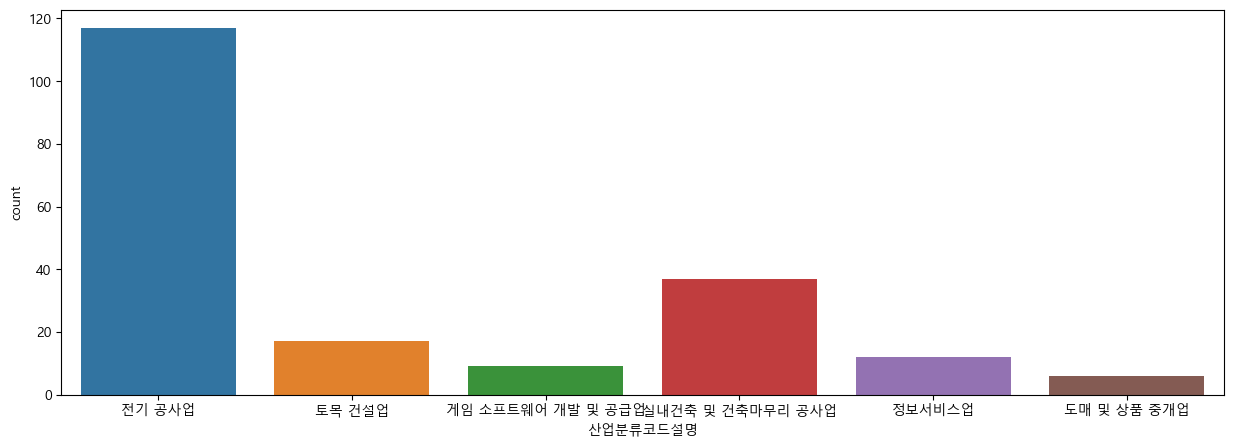

In [25]:
plt.figure(figsize = (15,5)) # 사이즈 조정
sns.countplot(data=df_m_reviews, x = '산업분류코드설명') # 각 분류별 리뷰 개수들

<AxesSubplot:xlabel='기업명', ylabel='count'>

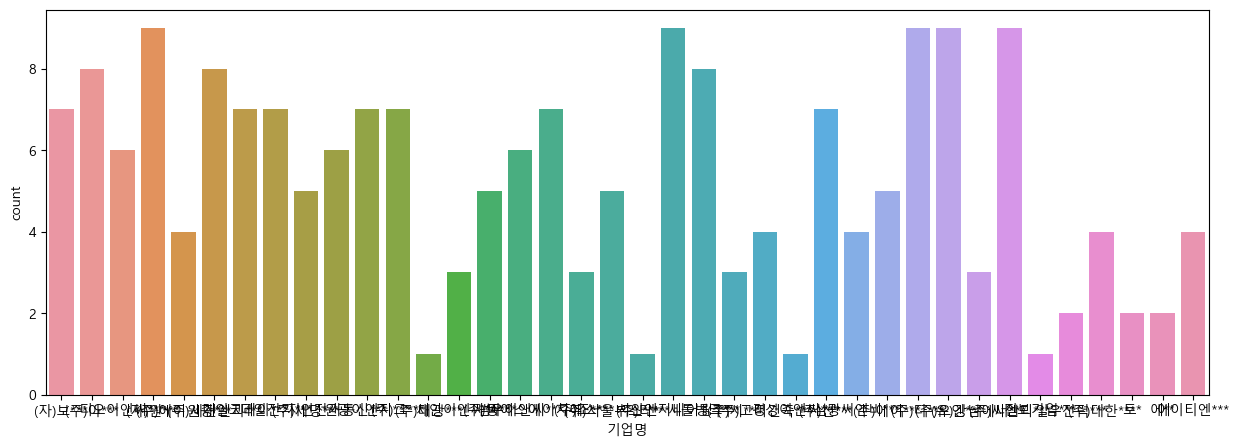

In [26]:
plt.figure(figsize = (15,5)) # 사이즈 조정
sns.countplot(data=df_m_reviews, x = '기업명') # 각 기업별 리뷰 개수들

In [27]:
df_m_reviews.corr()

사업자등록번호    산업분류코드   데이터수집일자    댓글작성년월      종합점수    승진기회점수  \
사업자등록번호   1.000000 -0.031278  0.079510  0.066515  0.106665  0.130614   
산업분류코드   -0.031278  1.000000 -0.740554  0.143537 -0.011712 -0.054584   
데이터수집일자   0.079510 -0.740554  1.000000 -0.100268 -0.040894  0.026352   
댓글작성년월    0.066515  0.143537 -0.100268  1.000000 -0.150978 -0.159362   
종합점수      0.106665 -0.011712 -0.040894 -0.150978  1.000000  0.590419   
승진기회점수    0.130614 -0.054584  0.026352 -0.159362  0.590419  1.000000   
복지및급여점수   0.023299  0.066709 -0.104583 -0.014902  0.649094  0.509857   
업무생명균형점수  0.140376  0.201550 -0.131695 -0.052890  0.495214  0.293931   
기업문화점수    0.109686  0.017295 -0.039771 -0.131463  0.768680  0.587907   
경영진점수     0.188146 -0.049094 -0.009072 -0.080683  0.724218  0.617956   

           복지및급여점수  업무생명균형점수    기업문화점수     경영진점수  
사업자등록번호   0.023299  0.140376  0.109686  0.188146  
산업분류코드    0.066709  0.201550  0.017295 -0.049094  
데이터수집일자  -0.104583 -0.131695 -0.039771 -0.009072  
댓글작성년월   -0.014902 -0.052890 -0.131463 -0.080683  
종합점수      0.649094  0.495214  0.768680  0.724218  
승진기회점수    0.509857  0.293931  0.587907  0.617956  
복지및급여점수   1.000000  0.530226  0.538513  0.536873  
업무생명균형점수  0.530226  1.000000  0.504894  0.387120  
기업문화점수    0.538513  0.504894  1.000000  0.776554  
경영진점수     0.536873  0.387120  0.776554  1.000000

c:\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


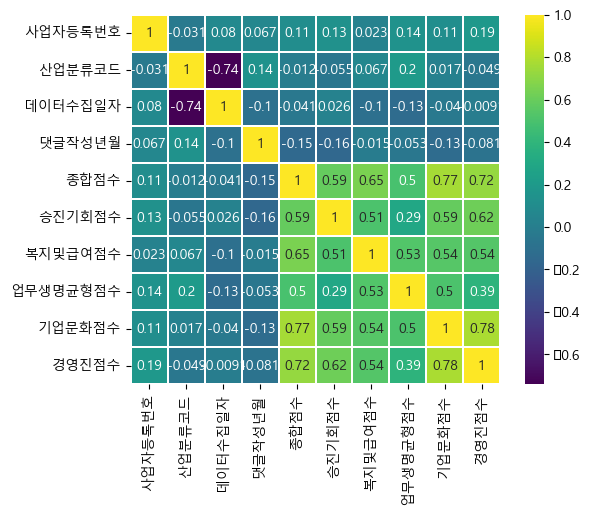

<Figure size 1500x800 with 0 Axes>

In [28]:
sns.heatmap(df_m_reviews.corr(), square=True, annot=True, cmap=plt.cm.viridis, linewidths=0.01, linecolor='white')
plt.figure(figsize=(10,10))
plt.gcf().set_size_inches(15, 8)
plt.show()

# Regression

In [29]:
# 지도학습에 필요한 라이브러리를 호출
from sklearn.model_selection import train_test_split
from sklearn.compose        import make_column_transformer
from sklearn.impute import KNNImputer
from imblearn.pipeline      import pipeline
from imblearn.pipeline      import make_pipeline
from sklearn.impute         import SimpleImputer, KNNImputer
from sklearn.preprocessing  import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV    # 교차검증

from sklearn.metrics   import classification_report     # 평가
import pickle
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Bagging Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [30]:
df_m_reviews.columns

Index(['사업자등록번호', '기업명', '전화번호', '팩스전화번호', '주소', '상세주소', '기업형태', '기업규모',
       '공기업구분', '산업분류코드', '산업분류코드설명', '데이터수집일자', '직군명', '직원여부분류명', '댓글작성년월',
       '종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수', '취업사이트댓글제목',
       '기업장점설명', '기업단점설명', '경영진요청사항설명', '기업성장가능성설명', '기업추천여부설명'],
      dtype='object')

In [31]:
df_m_reviews['기업추천여부설명'].value_counts()
df_m_reviews['기업추천여부설명'].isnull().sum()

0

In [32]:
def func1(data) :
    if data == '이 기업을 추천 합니다!' :
        return 0
    else : 
        return 1

In [33]:
df_m_reviews['추천여부'] = df_m_reviews['기업추천여부설명'].apply(func1)

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_27772\3761846570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m_reviews['추천여부'] = df_m_reviews['기업추천여부설명'].apply(func1)


In [34]:
df_m_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 78 to 18755
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업자등록번호    198 non-null    int64  
 1   기업명        198 non-null    object 
 2   전화번호       198 non-null    object 
 3   팩스전화번호     190 non-null    object 
 4   주소         198 non-null    object 
 5   상세주소       190 non-null    object 
 6   기업형태       198 non-null    object 
 7   기업규모       198 non-null    object 
 8   공기업구분      190 non-null    object 
 9   산업분류코드     198 non-null    float64
 10  산업분류코드설명   198 non-null    object 
 11  데이터수집일자    198 non-null    int64  
 12  직군명        89 non-null     object 
 13  직원여부분류명    198 non-null    object 
 14  댓글작성년월     192 non-null    float64
 15  종합점수       198 non-null    float64
 16  승진기회점수     198 non-null    float64
 17  복지및급여점수    198 non-null    float64
 18  업무생명균형점수   198 non-null    float64
 19  기업문화점수     198 non-null    float64
 20  경영진점수  

In [35]:
X = df_m_reviews[['산업분류코드설명','종합점수','승진기회점수','복지및급여점수','업무생명균형점수','기업문화점수','경영진점수', '기업형태']]
Y = df_m_reviews['추천여부']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

numeric_pipe = make_pipeline(SimpleImputer(), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))

In [37]:
preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수',
                                  '기업문화점수', '경영진점수']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['산업분류코드설명', '기업형태'])])

## DecisionTreeRegressor

In [38]:
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())

hyperparameter_list = {'decisiontreeregressor__max_depth' : range(5,10),
                        'decisiontreeregressor__min_samples_split' : range(5,10),
                        'decisiontreeregressor__min_samples_leaf' : range(5,10)}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['종합점수',
                                                                          '승진기회점수',
                                                                          '복지및급여점수',
                                                                          '업무생명균형점수',
                                                                          '기업문화점수',
                                                                          '경영진점수']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['산업분류코드설명',
                                                                          '기업형태'])])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1, param_grid={})

In [39]:
# 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print(f'r2_score_train : {r2_score(Y_train, Y_train_pred)}\n')
print(f'r2_score_test : {r2_score(Y_test, Y_test_pred)}\n')

encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)

df_importance['Importance']= best_model['decisiontreeregressor'].feature_importances_
df_importance.sort_values(by='Importance', ascending=False)

Y_train_pred : [1.         1.         1.         1.         1.         1.
 0.         1.         0.         0.         1.         0.
 1.         0.         0.         0.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.
 1.         1.         0.5        1.         0.33333333 0.
 1.         1.         1.         1.         1.         0.
 1.         1.         1.         0.         1.         0.
 0.5        1.         0.         1.         0.         1.
 1.         1.         0.5        1.         1.         0.
 1.         0.         1.         1.         0.         1.
 0.         1.         1.         1.         1.         0.
 0.         1.         1.         0.33333333 0.         0.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         1.         1.         1.
 0.         1.         1.         0.     

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Feature  Importance
0                   종합점수    0.380404
1                 승진기회점수    0.191139
10             x0_정보서비스업    0.070697
2                복지및급여점수    0.064343
3               업무생명균형점수    0.060140
5                  경영진점수    0.054535
7         x0_도매 및 상품 중개업    0.053484
11             x0_토목 건설업    0.043995
8    x0_실내건축 및 건축마무리 공사업    0.026205
12                 x1_외감    0.019660
13                 x1_일반    0.018384
4                 기업문화점수    0.017014
6   x0_게임 소프트웨어 개발 및 공급업    0.000000
9              x0_전기 공사업    0.000000
14              x1_코스닥등록    0.000000

## XGBRegressor

In [40]:
# 4. 파이프라인을 구성한다.
numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()
preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list)
                                            , (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, XGBRegressor())

hyperparameter_list = {
 'xgbregressor__max_depth':range(5,11),
 'xgbregressor__min_depth':range(5,11)
}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)


print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print(f'r2_score_train : {r2_score(Y_train, Y_train_pred)}\n')
print(f'r2_score_test : {r2_score(Y_test, Y_test_pred)}\n')


encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)
df_importance['Importance']= best_model['xgbregressor'].feature_importances_
df_importance.sort_values(by='Importance', ascending=False)


Y_train_pred : [ 9.98322427e-01  1.00085807e+00  9.99719381e-01  9.99878705e-01
  9.99607265e-01  1.00015867e+00 -3.62592284e-04  9.96120095e-01
 -1.06936123e-03 -4.22071535e-05  1.00136697e+00  8.48320196e-04
  9.99986887e-01 -4.49295097e-04  1.97167508e-04  8.48320196e-04
  9.99607265e-01  1.00106740e+00  9.98322427e-01  9.95860994e-01
  1.00010729e+00  1.00046408e+00  9.98322427e-01  9.99556839e-01
  1.00007212e+00  9.99488771e-01  9.99954939e-01  9.98239279e-01
  1.00010729e+00  9.91383016e-01  9.99412119e-01  9.99541700e-01
  9.99435484e-01  1.00010729e+00  1.00053144e+00  4.38634568e-04
  1.00053144e+00  9.99726951e-01  5.03149569e-01  9.99488771e-01
  3.33017319e-01  3.19153490e-03  9.94022310e-01  9.98762667e-01
  9.99968410e-01  1.00035596e+00  1.00019002e+00  1.97167508e-04
  9.98420715e-01  1.00085807e+00  9.95860994e-01 -5.86326700e-04
  9.99167085e-01  3.85940517e-03  5.03149569e-01  1.00009131e+00
  8.48320196e-04  9.97539878e-01  2.39403732e-03  1.00046408e+00
  9.984207

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Feature  Importance
0                   종합점수    0.227923
10             x0_정보서비스업    0.127668
7         x0_도매 및 상품 중개업    0.110482
1                 승진기회점수    0.106387
2                복지및급여점수    0.101570
11             x0_토목 건설업    0.091245
3               업무생명균형점수    0.061798
5                  경영진점수    0.045316
13                 x1_일반    0.041110
14              x1_코스닥등록    0.028741
4                 기업문화점수    0.021803
8    x0_실내건축 및 건축마무리 공사업    0.020167
9              x0_전기 공사업    0.011384
12                 x1_외감    0.003847
6   x0_게임 소프트웨어 개발 및 공급업    0.000560

In [41]:
df_importance.sort_values(by='Importance', ascending=False).index

Int64Index([0, 10, 7, 1, 2, 11, 3, 5, 13, 14, 4, 8, 9, 12, 6], dtype='int64')

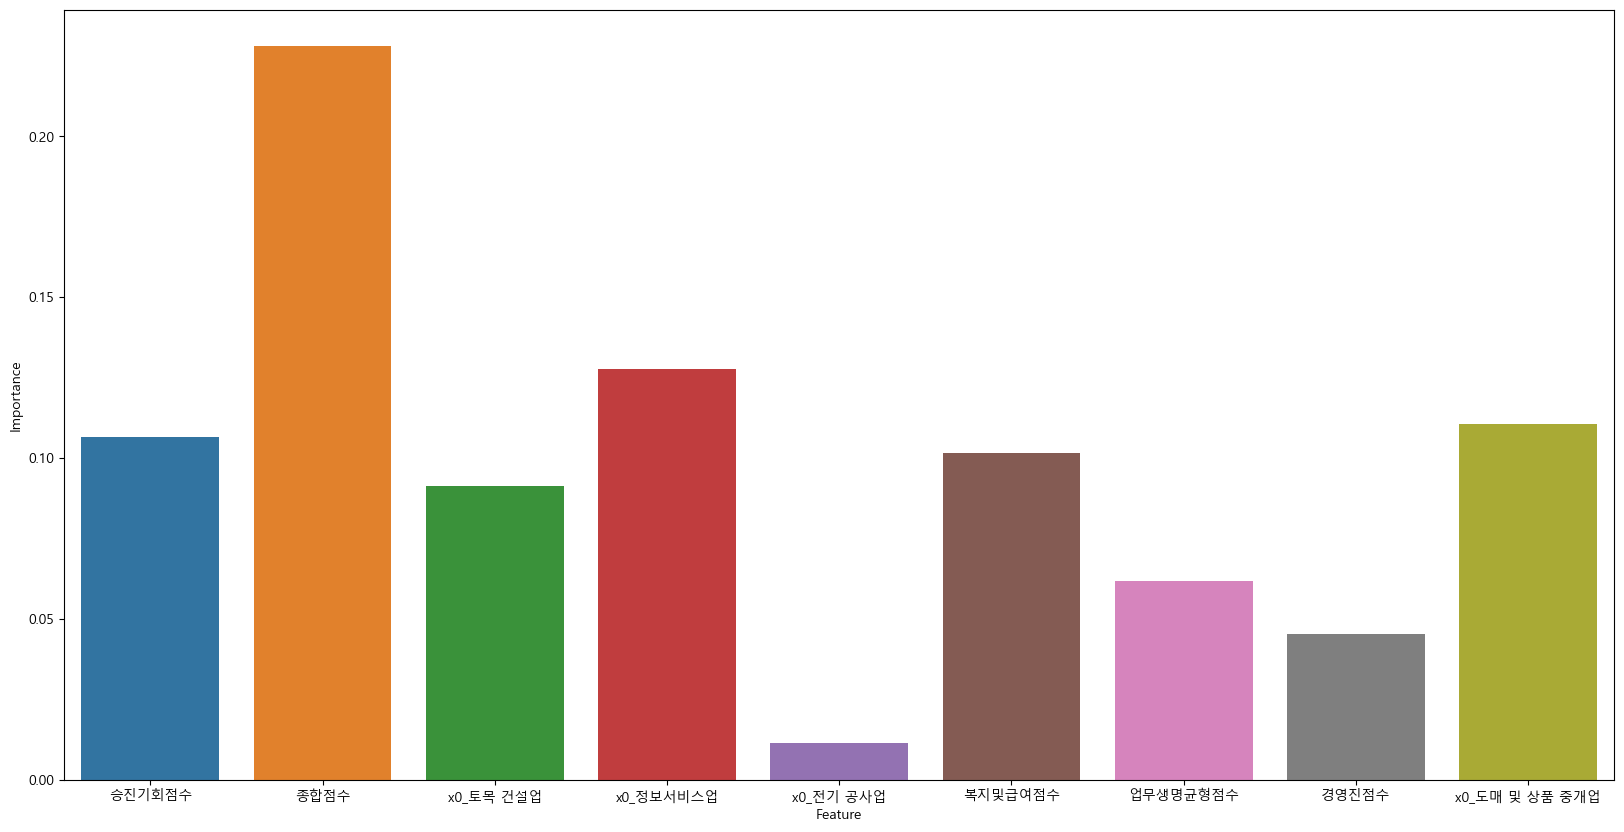

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_importance.iloc[[1, 0, 11, 10, 9, 2, 3, 5, 7]], x='Feature', y='Importance')
plt.show()

## RandomForestRegressor

In [43]:
# 4. 파이프라인을 구성한다.
numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()
preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list)
                                            , (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, RandomForestRegressor())
# 5. 교차검증 및 하이퍼 파라미터 튜닝
hyperparameter_list = {'randomforestregressor__max_depth':range(5,11)
                        , 'randomforestregressor__min_samples_leaf':range(5,11)
                        , 'randomforestregressor__min_samples_split':range(5,11)}
grid_model = GridSearchCV(model_pipe, param_grid={}
                            , cv=5, n_jobs=-1, scoring='f1')
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print(f'r2_score_train : {r2_score(Y_train, Y_train_pred)}\n')
print(f'r2_score_test : {r2_score(Y_test, Y_test_pred)}\n')

encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)


df_importance['Importance']= best_model['randomforestregressor'].feature_importances_
df_importance.sort_values(by='Importance', ascending=False)

c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Y_train_pred : [0.965      1.         0.99       1.         1.         1.
 0.02       0.64547619 0.07       0.         0.92       0.02
 1.         0.19611905 0.01       0.02       1.         0.995
 0.965      1.         1.         1.         0.965      1.
 1.         0.99       0.8125     0.87       1.         0.67
 1.         1.         1.         1.         1.         0.01
 1.         1.         0.51598016 0.99       0.37354762 0.15
 0.89       0.98       0.95       0.75       1.         0.01
 0.97       1.         1.         0.         1.         0.14
 0.51598016 1.         0.02       0.95       0.35       1.
 0.97       0.97       0.51598016 0.93       1.         0.08
 1.         0.05       1.         0.97       0.02       1.
 0.39       1.         0.99       1.         1.         0.21
 0.37       1.         0.98       0.37354762 0.01       0.056
 0.99       1.         1.         0.87       0.99       1.
 1.         1.         0.06       1.         1.         1.
 0.2365     0.99   

Feature  Importance
0                   종합점수    0.295400
1                 승진기회점수    0.172601
2                복지및급여점수    0.114780
5                  경영진점수    0.114444
4                 기업문화점수    0.089248
3               업무생명균형점수    0.063228
7         x0_도매 및 상품 중개업    0.031065
8    x0_실내건축 및 건축마무리 공사업    0.023494
9              x0_전기 공사업    0.023266
11             x0_토목 건설업    0.021945
10             x0_정보서비스업    0.018957
13                 x1_일반    0.014933
12                 x1_외감    0.010682
14              x1_코스닥등록    0.005957
6   x0_게임 소프트웨어 개발 및 공급업    0.000000

## 모델 평가

In [44]:
# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# 평가
print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.8941256611340465
0.4491703268790157


# Classification

In [45]:
df_m_reviews.columns

Index(['사업자등록번호', '기업명', '전화번호', '팩스전화번호', '주소', '상세주소', '기업형태', '기업규모',
       '공기업구분', '산업분류코드', '산업분류코드설명', '데이터수집일자', '직군명', '직원여부분류명', '댓글작성년월',
       '종합점수', '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수', '취업사이트댓글제목',
       '기업장점설명', '기업단점설명', '경영진요청사항설명', '기업성장가능성설명', '기업추천여부설명', '추천여부'],
      dtype='object')

In [46]:
# X = df_m_reviews[['산업분류코드설명','종합점수','승진기회점수','복지및급여점수','업무생명균형점수','기업문화점수','경영진점수', '기업형태']]
X = df_m_reviews[['산업분류코드설명','종합점수', '기업형태']]
Y = df_m_reviews['기업추천여부설명']
Y = df_m_reviews['기업성장가능성설명']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

numeric_pipe = make_pipeline(SimpleImputer(), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))

## DecisionClassifier

In [48]:
# 모델 선언 예시
# model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)


model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeClassifier(criterion = "entropy", max_depth = 2))

hyperparameter_list = {'decisiontreeregressor__max_depth' : range(5,10),
                        'decisiontreeregressor__min_samples_split' : range(5,10),
                        'decisiontreeregressor__min_samples_leaf' : range(5,10)}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print('학습능력평가')
print(classification_report(Y_train, Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))


Y_train_pred : ['비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷'
 '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '성장' '비슷' '비슷'
 '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '성장' '성장' '비슷'
 '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷']

Y_test_pred : ['성장' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '성장'
 '비슷'

## RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# 모델 선언 예시
# model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)


model_pipe = make_pipeline(preprocessing_pipe, RandomForestClassifier())

hyperparameter_list = {}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print('학습능력평가')
print(classification_report(Y_train, Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))



Y_train_pred : ['비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷'
 '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '성장' '성장'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷'
 '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '성장' '성장' '비슷'
 '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷']

Y_test_pred : ['성장' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '성장'
 '비슷'

## K-최근접

In [50]:
model_pipe = make_pipeline(preprocessing_pipe, KNeighborsClassifier(n_neighbors = 7))

hyperparameter_list = {}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print('학습능력평가')
print(classification_report(Y_train, Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))



Y_train_pred : ['비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷'
 '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '성장' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '성장' '성장' '비슷'
 '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷']

Y_test_pred : ['비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '비슷' '비슷' '비슷'
 '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '비슷' '성장' '비슷' '비슷' '성장'
 '비슷'

In [51]:
# import pickle   # Python 객체들을 하나의 파일로 변환
# pickle.dump(model_pipe, open('model_nlp.sav','wb'))

In [52]:
df_m_reviews[['산업분류코드설명','종합점수', '기업형태']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 78 to 18755
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   산업분류코드설명  198 non-null    object 
 1   종합점수      198 non-null    float64
 2   기업형태      198 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.2+ KB


In [53]:
df_m_reviews[['산업분류코드설명','종합점수', '기업형태']]

산업분류코드설명  종합점수 기업형태
78                전기 공사업  60.0   일반
79                전기 공사업  60.0   일반
80                전기 공사업  60.0   일반
81                전기 공사업  60.0   일반
82                전기 공사업  60.0   일반
...                  ...   ...  ...
17227  게임 소프트웨어 개발 및 공급업  40.0   일반
18748        도매 및 상품 중개업  80.0   일반
18750        도매 및 상품 중개업  20.0   일반
18753        도매 및 상품 중개업  80.0   일반
18755        도매 및 상품 중개업  80.0   일반

[198 rows x 3 columns]

In [54]:
# 새로운 데이터를 넣어 예측/분류
x1 = input('산업분류코드설명 값을 입력하시오 : ')
x2 = input('종합점수 값을 입력하시오 : ')
x3 = input('기업형태 값을 입력하시오 : ')

In [55]:
input_data = pd.DataFrame([[x1,x2,x3]], columns = ['산업분류코드설명','종합점수', '기업형태'])
input_data

산업분류코드설명 종합점수 기업형태
0   전기 공사업   10   일반

In [56]:
best_model.predict(input_data)

array(['비슷'], dtype=object)

# 프로파일링

In [57]:
# !pip install pandas_profiling

In [58]:
import pandas as pd
import pandas_profiling

profile = df_m_reviews.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
import pandas as pd

df_val = pd.read_csv('./data/tb_bs_ri_i.txt', sep='')
df_val.head()

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_22912\1405297399.py:3: DtypeWarning: Columns (3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_val = pd.read_csv('./data/tb_bs_ri_i.txt', sep='')


2208668613  20211010    65.75  D  36.0  C    16.25 D.1  13.5  A  ...  \
0  5088114481  20211010  51.4875  D  26.0  D  14.6875   D  10.8  D  ...   
1  2148101121  20211010  58.7500  D  32.0  D  16.2500   D  10.5  D  ...   
2  2148730201  20211010  52.5750  D  24.0  E  16.8750   D  11.7  C  ...   
3  1048170092  20211010  50.0750  D  24.0  E  14.3750   D  11.7  C  ...   
4  1208612196  20211010  58.8500  D  34.0  D  13.7500   D  11.1  C  ...   

   100.1 A.2  100.2 A.3  50.3 D.5  I  20211030  N Unnamed: 31  
0  100.0   A  100.0   A  50.0   D  I  20211030  N         NaN  
1   40.0   E  100.0   A  50.0   D  I  20211030  N         NaN  
2  100.0   A  100.0   A  50.0   D  I  20211030  N         NaN  
3  100.0   A  100.0   A  50.0   D  I  20211030  N         NaN  
4  100.0   A  100.0   A  50.0   D  I  20211030  N         NaN  

[5 rows x 32 columns]